# Entrenando un modelo de ~~IA~~ Graph Embeddings!

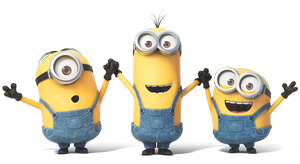

In [1]:
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory
import pandas as pd
import torch
import matplotlib.pyplot as plt

/home/jwackito/miniconda3/envs/csv2pront/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from pykeen.utils import resolve_device
resolve_device()
triples_file = 'dataset/dataset_train.tsv.gz'
triples_factory = TriplesFactory.from_path(triples_file,create_inverse_triples=True)
triples_factory

TriplesFactory(num_entities=418172, num_relations=48, create_inverse_triples=True, num_triples=2008458, path="/home/jwackito/git/TopicosIngenieriaSoftware2-2024/dataset/dataset_train.tsv.gz")

In [4]:
pipeline_result = pipeline(
    training=triples_file,
    testing=triples_file,
    model="TransH",
    # Training configuration
    training_kwargs=dict(
        num_epochs=100,
        use_tqdm_batch=False,
    ),
    # Runtime configuration
    random_seed=1234,
    device="cuda:1", #cpu
)

Training epochs on cuda:1: 100%|██████████| 100/100 [1:24:43<00:00, 50.83s/epoch, loss=0.105, prev_loss=0.105]
Evaluating on cuda:1: 100%|██████████| 2.01M/2.01M [1:13:13<00:00, 457triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 4399.73s seconds


In [5]:
grupo_nro = 1
pipeline_result.save_to_directory(f'models/inmuebles_grupo_{grupo_nro:02}.v2')

INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=418172, num_relations=24, create_inverse_triples=False, num_triples=2008458, path="/home/jwackito/git/TopicosIngenieriaSoftware2-2024/dataset/dataset_train.tsv.gz") to file:///home/jwackito/git/TopicosIngenieriaSoftware2-2024/models/inmuebles_grupo_01.v2/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /home/jwackito/git/TopicosIngenieriaSoftware2-2024/models/inmuebles_grupo_01.v2
